In [1]:
from scipy.special import spherical_jn as jn
from scipy.special import spherical_yn as yn
from scipy.special import jnyn_zeros as jnyn_zeros
from scipy.special import hyp2f1 as hyp2f1
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
%matplotlib inline

In [2]:
# Just a generic function that takes an array
# and returns indexes at which it crosses zero
def find_all_zeros(function):
    all_zeros = []
    for i in range(np.size(function)-1):
        if np.isnan(function[i]) or np.isnan(function[i]):
            continue
        if np.sign(function[i]) != np.sign(function[i+1]):
            all_zeros.append(i)
    return np.array(all_zeros)

In [3]:
# Find k_n values up to k_max = 0.3
# for boundary conditions that say function is zero at rmin and rmax
def find_kln(R1, R2, l, n):
    k = np.arange(0.0001,0.3,0.00001)
    f1 = jn(l, R2*k)*yn(l, R1*k) - jn(l, R1*k)*yn(l, R2*k)
    all_zeros = find_all_zeros(f1)
    return k[all_zeros[n]]

In [4]:
# A similar function that returns all the k_n values
def find_kln_all(R1, R2, l, kmax):
    k = np.arange(0.0001,kmax,0.00001)
    f1 = jn(l, R2*k)*yn(l, R1*k) - jn(l, R1*k)*yn(l, R2*k)
    all_zeros = find_all_zeros(f1)
    return k[all_zeros]

In [5]:
# Eigenfunctions (c = jn/yn)
def find_eigenfln(R1, R2, l, n):
    kln = find_kln(R1, R2, l, n)
    fln = lambda x: jn(l, kln*x) - jn(l, R1*kln)/yn(l, R1*kln)*yn(l, kln*x)
    return fln

In [6]:
# Distance to a redshift
def distance(z):
    dist = quad(lambda x: 1/np.sqrt(0.3*(1+x)**3+0.7),0,z)
    return dist[0]*3000.0

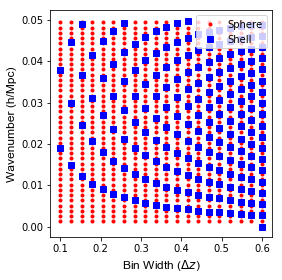

In [7]:
# An example of a shell. 
# I am plotting real eigenvalues and I compare them to the eigenvalues
# of a sphere (instead of a spherical shell)
zmax = 1.1
R2 = distance(zmax)
z = np.linspace(0.5, 1, 20)
kmax = 0.05
k = np.arange(0.0001,kmax,0.00001)
l = 0
plt.figure(figsize=(4,4))
plt.xlabel(r'Bin Width ($\Delta z$)',fontsize=12,fontname='Arial')
plt.ylabel('Wavenumber (h/Mpc)',fontsize=12,fontname='Arial')
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.tight_layout()
for zz in z:
    R1 = distance(zz)
    kln_ind = find_all_zeros(jn(l,k*R2))
    for kk in kln_ind:
        plt.plot(zmax-zz,k[kk],'.r')
    kln = find_kln_all(R1,R2,l,kmax)
    for kk in kln:
        plt.plot(zmax-zz,kk,'sb') 
plt.plot(0.6, 0, '.r', label='Sphere')
plt.plot(0.6, 0, 'sb', label='Shell')
plt.legend(loc='upper right')
plt.savefig('modes_comparison.png',dpi=300)
#for l in range(lmax):
#    for n in range(nmax):
#        plt.plot(l,np.pi/(R2 - R1)*(n + 1),'.g')

2314.281199283433 2479.843876861672


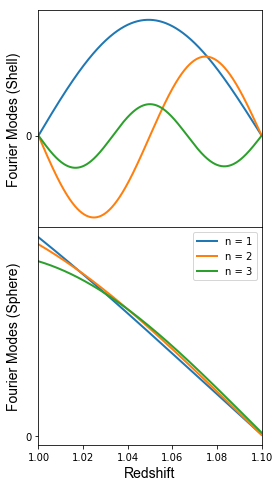

In [8]:
# Make plot comparing spherical shell modes vs sphere modes
zmin = 1.0
zmax = 1.1
R1 = distance(zmin)
R2 = distance(zmax)
print(R1,R2)
l = 10
k = np.arange(0.0001,0.3,0.00001)
r = np.linspace(R1,R2,1000)
zet = np.linspace(zmin,zmax,1000)
f = plt.figure(figsize=(4,8))
ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)
ax1.set_yticks([0])
ax2.set_yticks([0])
ax1.set_xticks([])
#ax2.set_xticklabels([2300, 2350, 2400, 2450, 2500],fontsize=12)
ax2.set_xlabel('Redshift',fontsize=14,fontname='Arial')
ax1.set_ylabel('Fourier Modes (Shell)',fontsize=14,fontname='Arial')
ax2.set_ylabel('Fourier Modes (Sphere)',fontsize=14,fontname='Arial')
#ax1.grid()
#ax2.grid()
plt.subplots_adjust(hspace=0)
#plt.tight_layout()
for n in range(3):
    fnl = find_eigenfln(R1,R2,l,n)
    kln_ind = find_all_zeros(jn(l,k*R2))
    sfb_shell = fnl(r)
    ax1.plot(zet,sfb_shell,linewidth=2)
    sfb_sphere = jn(l,k[kln_ind[n]]*r)
    if n == 1:
        sfb_sphere *= -1
    leg = 'n = ' + str(n + 1)
    ax2.plot(zet,sfb_sphere,linewidth=2,label=leg)
ax1.set_xlim([1, 1.1])
ax2.set_xlim([1, 1.1])
ax2.legend()
plt.savefig('radial_modes.png',dpi=300)

In [9]:
# Legendre functions
# From wikipedia, but need to verify that formula is correct
def Plm(l,m,x):
    value = ((1 + x)/(1 - x))**(m/2.)/factorial(1 - m)*hyp2f1(-l, l+1, 1-m, (1-x)/2.)
    return value

In [10]:
# Find l spectrum for value of cos(theta_max)
def find_lm(xedge, m):
    l = np.arange(0,50,0.01)
    f1 = Plm(l, m, xedge)
    all_zeros = find_all_zeros(f1)
    return l[all_zeros]

In [11]:
# Check that it makes sense
print(find_lm(np.cos(0.9),0))
print(find_lm(-0.6,0))
print(find_lm(0,0))
# Don't understad why the roots are repeated for the last case
# The rest look OK

[ 2.15  5.62  9.11 12.59 16.08 19.57 23.06 26.55 30.04 33.53 37.02 40.51
 44.   47.49]
[ 0.53  1.96  3.39 ... 49.94 49.95 49.98]
[ 0.99  1.    2.99  3.    4.99  5.    6.99  7.    8.99  9.   10.99 12.99
 13.   15.   17.   19.   21.   22.99 23.   25.   26.99 27.   28.99 31.
 32.99 33.   34.99 35.   36.99 39.   41.   42.99 45.   46.99 48.99]


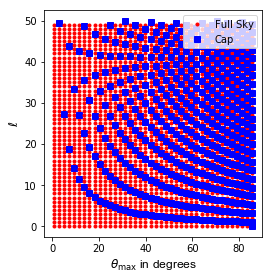

In [12]:
# Plot l values as a function of theta_max
theta_max = np.linspace(0.01,1.5,40)
lmax = 50
m = 0
plt.figure(figsize=(4,4))
plt.xlabel(r'$\theta_\mathrm{max}$ in degrees',fontsize=12,fontname='Arial')
plt.ylabel(r'$\ell$',fontsize=12,fontname='Arial')
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.tight_layout()
for tt in theta_max:
    l = np.arange(0,lmax,0.001)
    xedge = np.cos(tt)
    f1 = Plm(l, -m, xedge)
    all_zeros = find_all_zeros(f1)
    tt *= 180.0/np.pi
    for ll in range(lmax):
        plt.plot(tt,ll,'.r')
    for ll in all_zeros:
        plt.plot(tt,l[ll],'sb')
plt.plot(1.5*180.0/np.pi, 0, '.r', label='Full Sky')
plt.plot(1.5*180.0/np.pi, 0, 'sb', label='Cap')
plt.legend(loc='upper right')
plt.savefig('ell_m_comparison.png',dpi=300)